# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ploty
import plotly.express as px

#import statistical libaries
import scipy.stats as stats

#import libraries for randomized data splitting into train and test
from sklearn.model_selection import train_test_split

#import function to build linear regression_model
from sklearn.linear_model import LinearRegression

#import libraries for building linear regression_model
import statsmodels.api as sm

# import libraries to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/used_device_data.csv')

In [93]:
!jupyter nbconvert --to html SLF_Project_solution_notebook\ .ipynb

[NbConvertApp] Converting notebook SLF_Project_solution_notebook .ipynb to html
[NbConvertApp] Writing 1379661 bytes to SLF_Project_solution_notebook .html


## Data Overview

- Observations
- Sanity checks

In [4]:
# view the first 5 rows
ds.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
# view the last 5 rows
ds.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [6]:
#check the shape of the dataframe
ds.shape

(3454, 15)

In [7]:
print('The dataframe has', ds.shape[0], 'rows and', ds.shape[1],'columns.')

The dataframe has 3454 rows and 15 columns.


In [8]:
# Use info() to print a concise summary of the DataFrame
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Observation:
* There are 11 numerical columns in the datasets and 4 categorical columns.

In [9]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


### Observation:
* On average the price of used phones is about 4.3 euros and the average price of new phones is 5.2 euros.
* We also notice that some columns are missing values, this will be treated.
* it can also be noticed that majority of phones have a ram size of 4GB.

In [10]:
# check the count of all categorical values in each categorical variable
# first make a list of all categorical variables 
cat_cols=['brand_name','os','4g','5g']
# using for loop
for column in cat_cols:
  print(ds[column].value_counts())
  print('_'*40)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
________________________________________
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
________________________________________
yes    2335
no     1119
Name: 4g, dtype: int64
________________________________________
no     3302
yes     152
Name: 5g, dtype: int64
________________________________________


In [11]:
# create a copy of dataset,so no changes affect original dataset
ds_copy= ds.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [12]:
# define function to combine boxplot and histogram on the same scale
def histogram_boxplot(ds, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    ds: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Number of rows of the subplot grid= 2, and x-axis will be shared among all subplots when sharex= True
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize,)
    # create the 2 subplots 
    sns.boxplot(data=ds, x=feature, ax=ax_box, showmeans=True, color="violet")
    sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist, bins=bins) if bins else sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist)
    # Create the histogram and add the mean and median
    ax_hist.axvline(ds[feature].mean(), color="green", linestyle="--") 
    ax_hist.axvline(ds[feature].median(), color="black", linestyle="-") 

In [13]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    ds: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = ds[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2,6))
    else:
        plt.figure(figsize=(n+2,6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=ds,
        x=feature,
        palette="Paired",
        order=ds[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

### 1. What does the distribution of normalized used device prices look like?

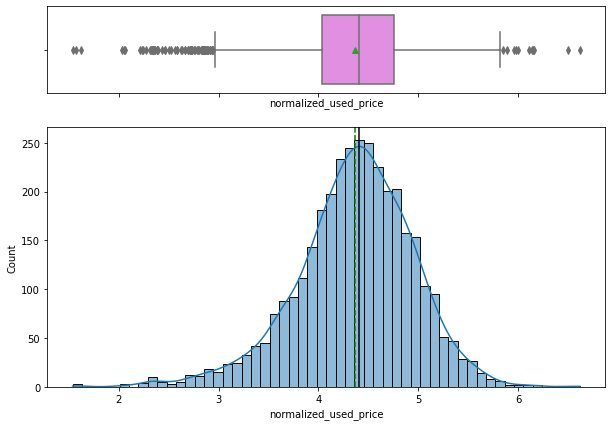

In [14]:
histogram_boxplot(ds,"normalized_used_price",kde=True);

### Observation:
* The distribution for normalized used price seems to be a  normal distribution with a mean price of 4.3 euros and a median price of 4.4 euros.
* The distribution contains outliers.

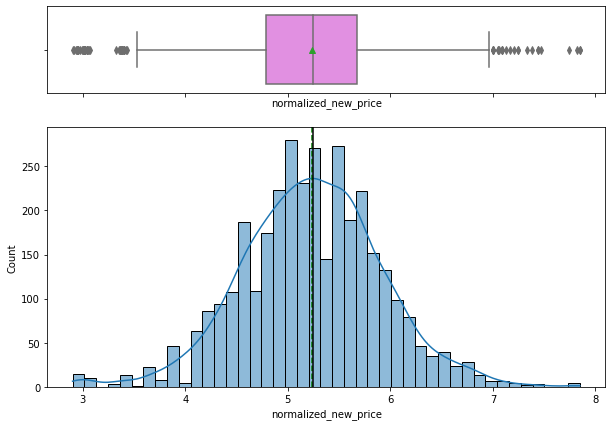

In [15]:
histogram_boxplot(ds,"normalized_new_price",kde=True);

### Observation:
* The distribution for normalized new price seems to be close to a normal distribution with it's mean and median price being approximately 5.2 euros .
* The distribution contains outliers.

### 2. Percentage of the used device market dominated by Android devices?

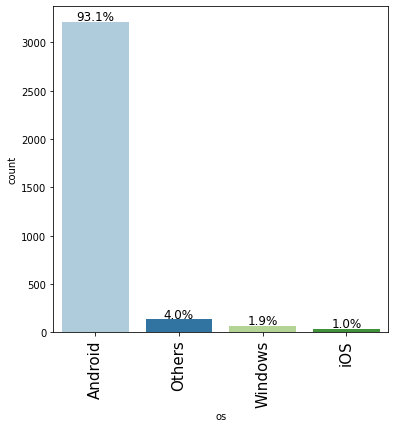

In [16]:
# create barplot showing percentage of market dominated by each os type
labeled_barplot(ds, "os", perc=True)

### Observation:
* Android dominates majority of the market with 93.1% of used phones running on android os.

### 3. How does the amount of RAM vary with the brand?

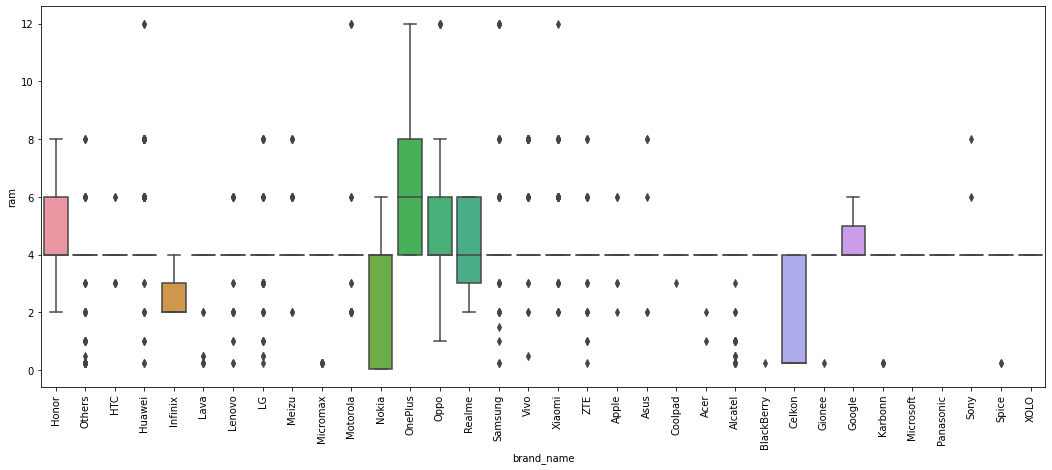

In [17]:
# Create a boxplot showing relationship between brand name and ram size 
plt.figure(figsize=(18, 7))
plt.xticks(rotation=90)
sns.boxplot(data=ds, x="brand_name", y="ram");

### Observation:
* For most of the phone brands, 25%,50% and 75% of their phones operate on 4GB ram, with the exception of Honor,Infinix, Nokia, Oneplus, Oppo, Realme, Celkon and google.
* For the brands having majorly 4GB ram phones, outliers were detected which could mean errors could have occured during dataset compilation.

### 4.How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [18]:
# count number of phones with battery larger than 4500mAh
ds_battery_above4500 = ds[ds["battery"]>4500]
print(ds_battery_above4500['battery'].count())

341


<Figure size 504x504 with 0 Axes>

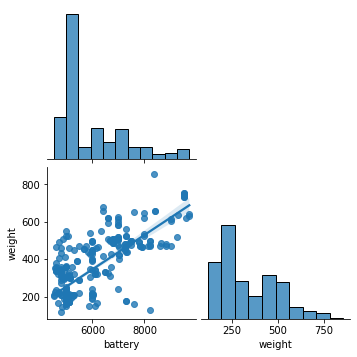

In [19]:
plt.figure(figsize=(7, 7))
sns.pairplot(data=ds_battery_above4500[["battery","weight"]], corner=True, kind="reg");

In [20]:
print('The Linear correlation factor between pnone battery size and phone weight is ',str(round(ds_battery_above4500.corr()["weight"]["battery"] , 2)))

The Linear correlation factor between pnone battery size and phone weight is  0.76


### Observation:
* Number of phones with battery capacities higher than 4500mAh is 341.
* The two variables are positively correlated with a linear correlation factor of 0.76 (i.e as the battery capacity of the phone increases, the weight of the phone tends to increase).

### 5. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [21]:
ds_screensize_above6 = ds[ds["screen_size"]>6]
print(ds_screensize_above6['screen_size'].count())

3362


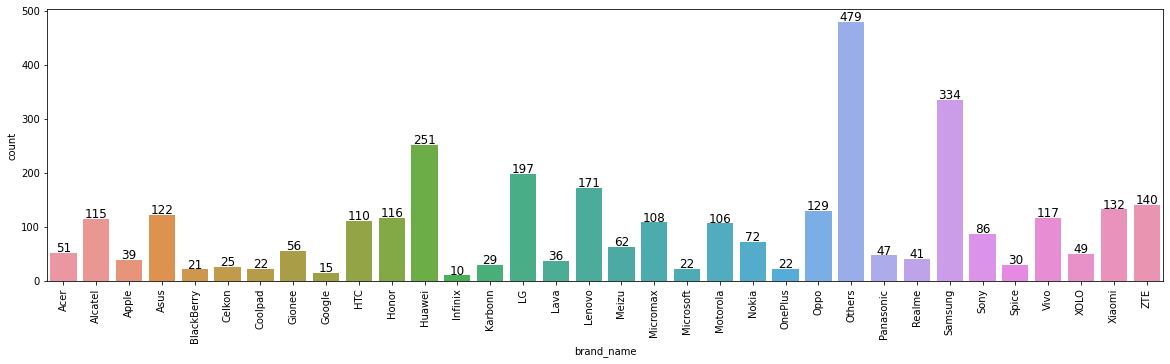

In [22]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = ds_screensize_above6.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
plt.show()

### Observation:
* There are 3362 phones and tablets with screen size above 6 inches.
* non labeled phones(others) has the highest count(479) for phones and tablets with screen size above 6 inches.
* Samsung phones followed by Huawei phones have the second and third highest number of phones,331 and 251 respectively.

### 6.What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [23]:
ds_sc_above8mp = ds[ds["selfie_camera_mp"]>8]
print(ds_sc_above8mp['selfie_camera_mp'].count())

655


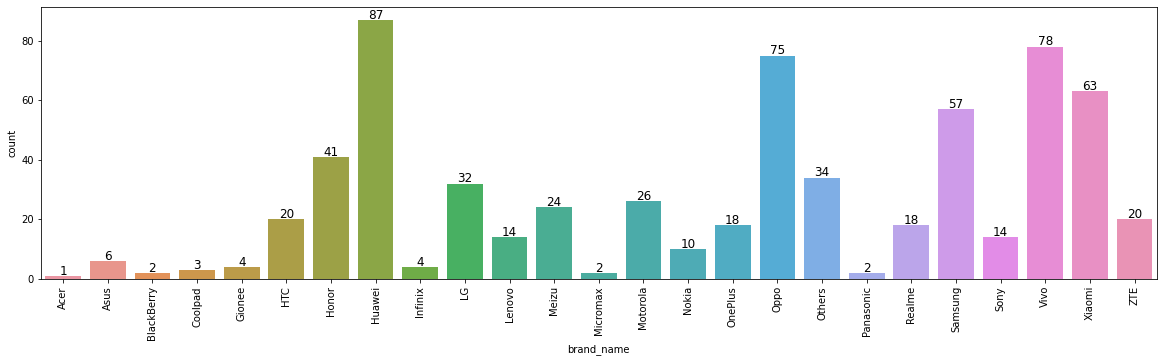

In [24]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = ds_sc_above8mp.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
plt.show()

### Observation:
* Huuawei offers the highest number of devices (87) with selfie cameras higher than 8mp.
* Vivo and Oppo offers the second and third highest number of devices (78 & 75 repectively), with selfie cameras higher than 8mp. Followed by samsung with 57 phones and tablets offering higher than 8mp sefie cameras.

### 7. Which attributes are highly correlated with the normalized price of a used device?

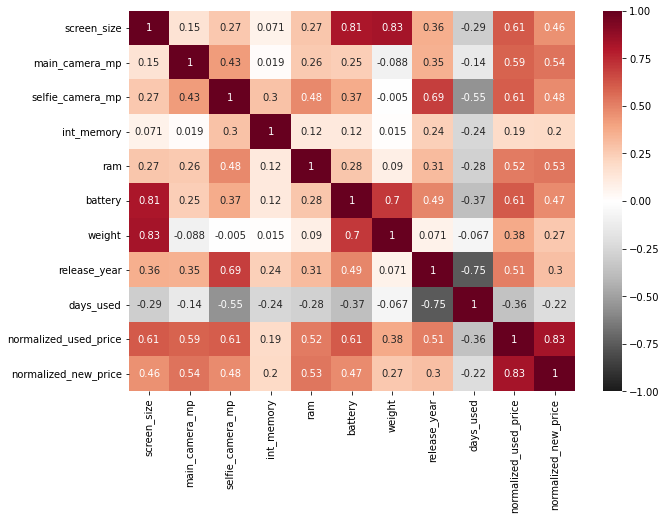

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(ds.corr(),annot=True,cmap='RdGy_r',vmin=-1,vmax=1);

### Observation:
* Normalized old price is  correlated with normalized new price with a coorelation factor of 0.83. this means if a new phone is expensive, the used version of that phone would very likely be expensive to when compared to other used phone prices.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [26]:
# missing value check
ds_copy.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observation:
* Columns such as main_camera mp,selfie _camera mp,int_memory,ram,battery and weight have some missing values.

In [27]:
# checking column medians
ds_copy.median()

<ipython-input-27-3a7b97d76350>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds_copy.median()


screen_size                12.830000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [28]:
# Replace the missing values with median values of the columns.
ds_copy['main_camera_mp']= ds_copy['main_camera_mp'].fillna(ds_copy['main_camera_mp'].median())
ds_copy['selfie_camera_mp']= ds_copy['selfie_camera_mp'].fillna(ds_copy['selfie_camera_mp'].median())
ds_copy['int_memory']= ds_copy['int_memory'].fillna(ds_copy['int_memory'].median())
ds_copy['ram']= ds_copy['ram'].fillna(ds_copy['ram'].median())
ds_copy['battery']= ds_copy['battery'].fillna(ds_copy['battery'].median())
ds_copy['weight']= ds_copy['weight'].fillna(ds_copy['weight'].median())

In [29]:
ds_copy.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Observation:
* All missing valus have been replaced with the median of each column. There are no missing values anymore.

### Feature Engineering 

#### Log Transformation

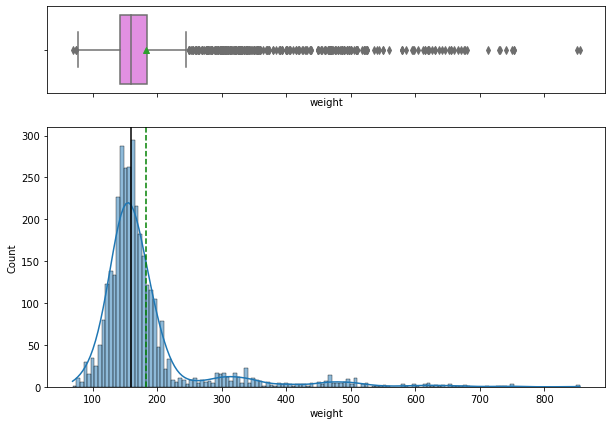

In [30]:
# Check if the weight column needs transformation
histogram_boxplot(ds_copy,"weight",kde=True);

In [31]:
# create log of weight column
ds_copy["weight_log"] = np.log(ds_copy["weight"])
ds_copy.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


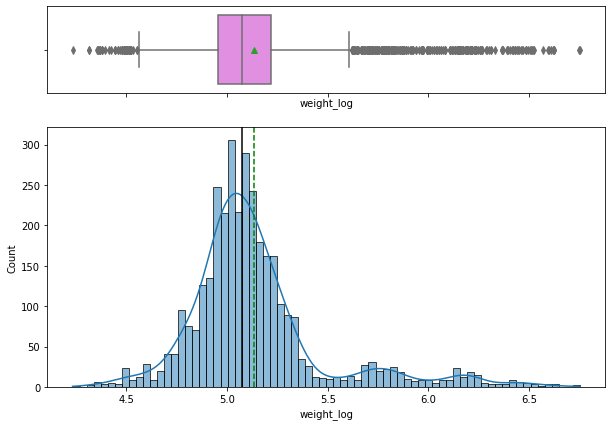

In [32]:
# Plot the graph of weight_log
histogram_boxplot(ds_copy,"weight_log",kde=True);

* The graph of weight log shows that the distribution of the log transformation of weight follows a more normal distribution when compared to that of weight.

In [33]:
# drop weight column
ds_copy.drop(["weight"], axis=1, inplace=True)

In [34]:
ds_copy.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220356


* The weight column has been dropped.

###  Outlier detection and treatment

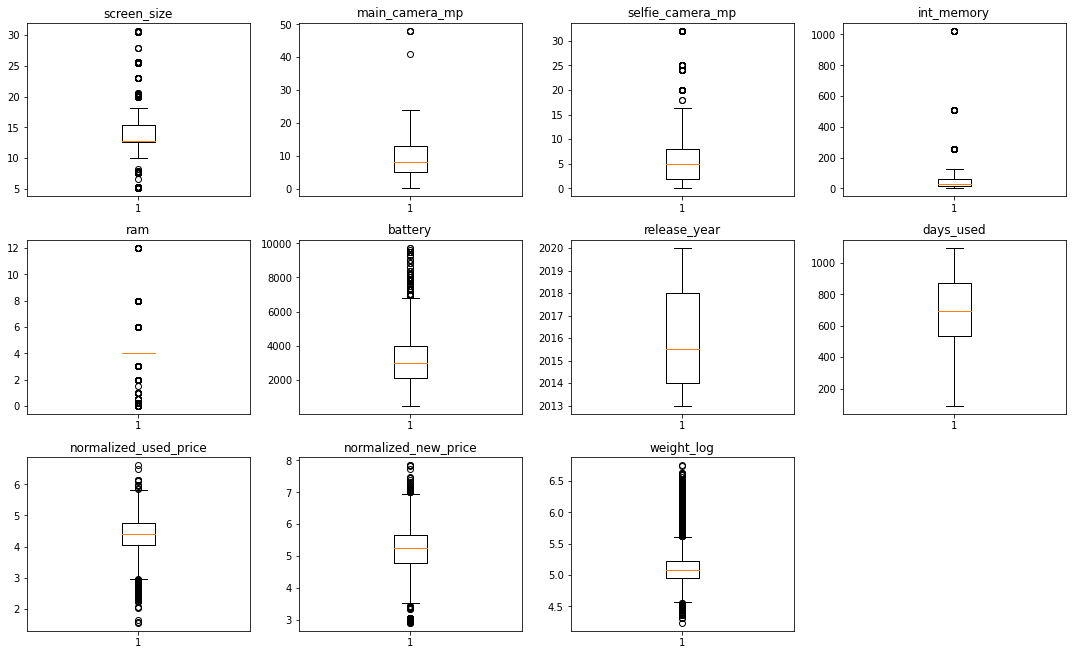

In [35]:
# outlier detection 
plt.figure(figsize=(15, 15))

for i, variable in enumerate(ds_copy.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(ds_copy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Outliers have been detected in majority of the numerical columns.
* We will treat treat outliers except for ram as the outliers are the variations in ram which will be affected if treated.

### Outlier Treatment

In [36]:
# Define function to treat outliers
def treat_outliers(ds_treated, col):
    """
    Treats outliers in a variable

    ds_treated: dataframe
    col: dataframe column
    """
    Q1 = ds_treated[col].quantile(0.25)  # 25th quantile
    Q3 = ds_treated[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    ds_treated[col] = np.clip(ds_treated[col], Lower_Whisker, Upper_Whisker)

    return ds_treated


def treat_outliers_all(ds_treated, col_list):
    """
    Treat outliers in a list of variables

    ds_treated: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        ds_treated = treat_outliers(ds_treated, c)

    return ds_treated

In [37]:
# list of columns to treat for outliers
treat_out_cols = ["int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size",
                  "weight_log","battery","normalized_new_price"]                                

In [38]:
ds_treated=treat_outliers_all(ds_copy, treat_out_cols)

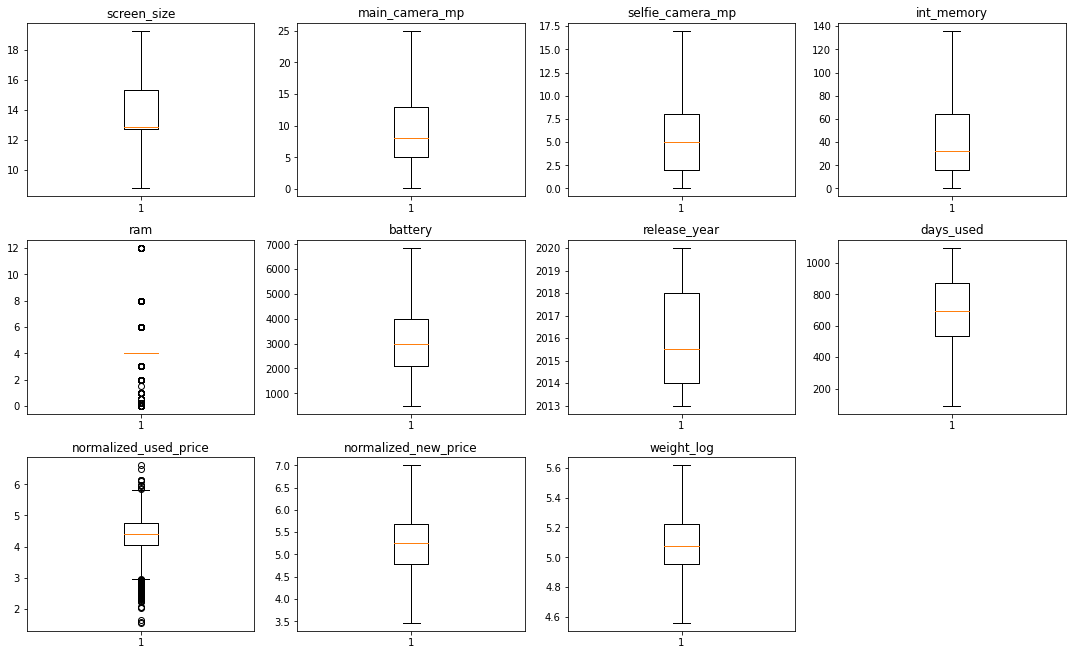

In [39]:
# Check to see if outliers were treated
plt.figure(figsize=(15, 15))

for i, variable in enumerate(ds_treated.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(ds_treated[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation:
* All otliers have been treated except for ram and normalized used price.
* we did not remove the outliers of ram so as to preserve the variations as majority of the phones have the same ram GB.
* The outliers of normalized used price weren't treated because it is the dependent variable.

#### Check if treating the outliers affected the dataset

In [40]:
ds_treated.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,2020,345,5.135387,5.630961,5.617149
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220356


In [41]:
# check to see if the treated dataset has any mising values
ds_treated.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

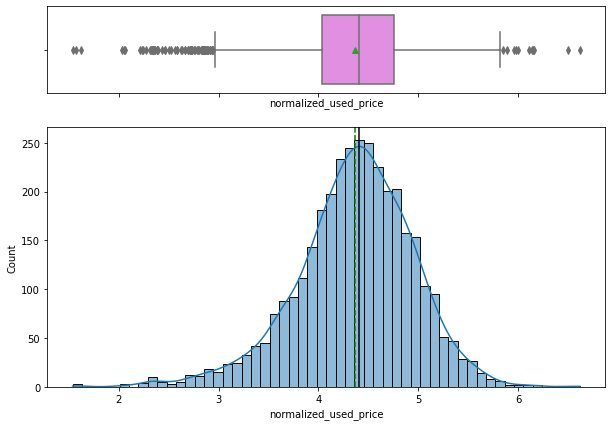

In [42]:
# Let us explore the data after manipulation

histogram_boxplot(ds_treated,"normalized_used_price",kde=True);

### Observation:
* The plot of normalized used price follows a normal distribution even after manipulation and it's outliers are preserved.

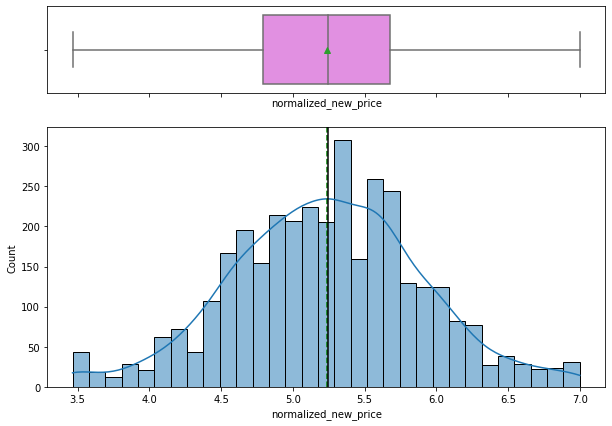

In [43]:
histogram_boxplot(ds_treated,"normalized_new_price",kde=True);

### Observation:
* The distribution for normalized new price seems to be close to a normal distribution with it's mean and median price being approximately 5.2 euros .
* The distribution does not contains outliers as it's outliers have been removed.

#### Analyze how the weight varies for phones and tablets offering large batteries (more than 4500 mAh) after manipulation.

In [44]:
# count number of phones with battery larger than 4500mAh
ds_battery_above4500_treated = ds_treated[ds_treated["battery"]>4500]
print(ds_battery_above4500_treated['battery'].count())

341


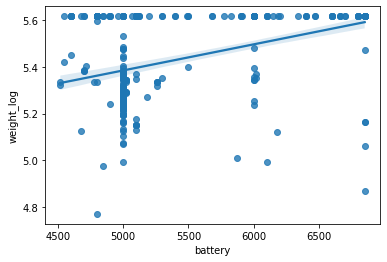

In [45]:
sns.regplot(x="battery", y ="weight_log", data=ds_battery_above4500_treated);

In [46]:
print('The Linear correlation factor between pnone battery size and phone weight log is ',str(round(ds_battery_above4500_treated.corr()["weight_log"]["battery"] , 2)))

The Linear correlation factor between pnone battery size and phone weight log is  0.49


### Observation:
* Number of phones with battery capacities higher than 4500mAh remains 341.
* The two variables log of weight(weight_log) and battery size now have a weak positive correlateion with a linear correlation factor of 0.49 after weight column was dropped and replaced with the weight_log column.

#### Number of phones and tablets are available across different brands with a screen size larger than 6 inches after manipulation.

In [47]:
ds_screensize_above6_treated = ds_treated[ds_treated["screen_size"]>6]
print(ds_screensize_above6_treated['screen_size'].count())

3454


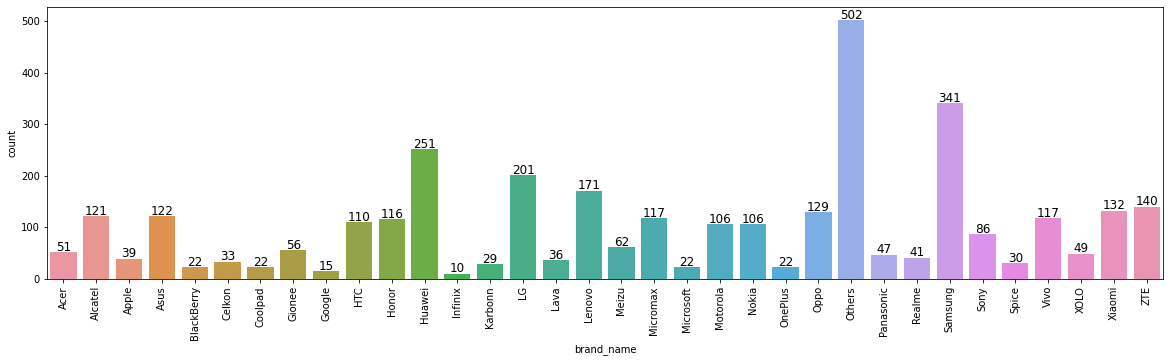

In [48]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = ds_screensize_above6_treated.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
plt.show()

### Observation:
* There are now 3545 phones and tablets with screen size above 6 inches as against the previous 3362 count before outliers were removed.
* non labeled phones(others) has the highest count(502) for phones and tablets with screen size above 6 inches.
* Samsung phones followed by Huawei phones have the second and third highest number of phones,341 and 251 respectively.


#### Distribution of devices offering greater than 8MP selfie cameras after manipuation

In [49]:
ds_sc_above8mp_treated = ds_treated[ds_treated["selfie_camera_mp"]>8]
print(ds_sc_above8mp_treated['selfie_camera_mp'].count())

655


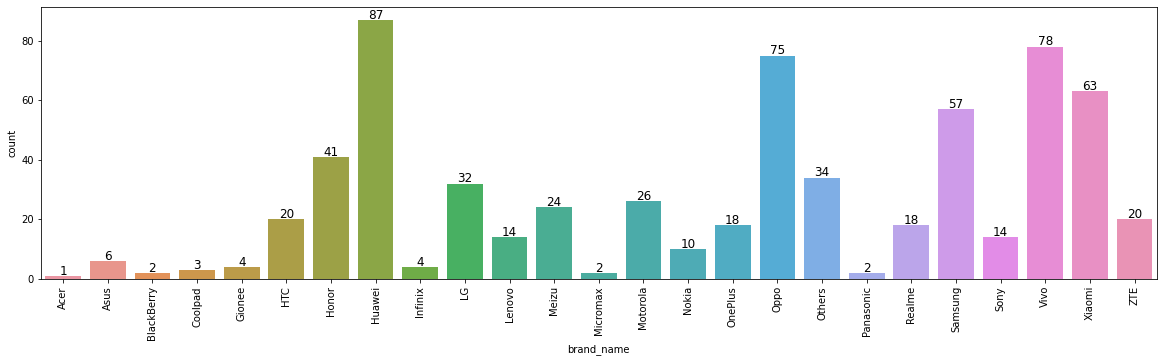

In [50]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = ds_sc_above8mp_treated.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
plt.show()

### Observation:
* Huuawei sill offers the highest number of devices (87) with selfie cameras higher than 8mp.
* Vivo and Oppo offers the second and third highest number of devices (78 & 75 repectively), with selfie cameras higher than 8mp. Followed by samsung with 57 phones and tablets offering higher than 8mp sefie cameras.
* Nothing changed statistically after manipulation.

### Correlation between the variables

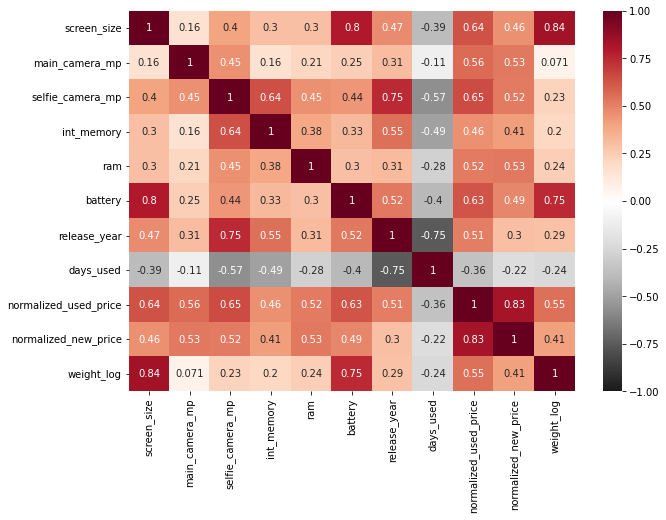

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(ds_treated.corr(),annot=True,cmap='RdGy_r',vmin=-1,vmax=1);

### Observation:
* The strongest positive correlation remains between normalized used price and normalized new price.
* Normalized used price also has a good positive correlation of 0.64 with screen size.

## Data preparation for modeling

In [52]:
# drop the brand name column for prediction purposes
ds_treated=ds_treated.drop(['brand_name'], axis=1)

In [53]:
X = ds_treated.drop(["normalized_used_price"], axis=1)
y = ds_treated["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  release_year  days_used  normalized_new_price  \
0        64.0  3.0   3020.0          2020        127              4.715100   
1       128.0  8.0   4300.0          2020        325              5.519018   
2       128.0  8.0   4200.0          2020        162              5.884631   
3        64.0  6.0   6850.0          2020        345              5.630961   
4        64.0  3.0   5000.0          2020        293              4.947837   

   weight_log  
0    4.983607  
1    5.361292  
2    5.361292  
3    5.617149  
4    5.220356  

0    4.

In [54]:
# Add the intercept to data
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
# create dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_new_price,weight_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,2020,127,4.715100,4.983607,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,2020,325,5.519018,5.361292,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,2020,162,5.884631,5.361292,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,2020,345,5.630961,5.617149,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,2020,293,4.947837,5.220356,0,0,0,1,0


In [56]:
# split the data into 70:30 ratio for train and test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [57]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [58]:
print(x_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  release_year  days_used  normalized_new_price  weight_log  \
3026   1800.0          2014        819              4.796204    4.787492   
1525   4050.0          2016        585              5.434595    5.416100   
1128   2550.0          2015        727              5.137914    5.087596   
3003   3200.0          2015        800              5.189228    5.075174   
2907   2900.0          2017        560              5.016220    5.075174   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
3026          

In [59]:
print(x_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       136.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  release_year  days_used  normalized_new_price  weight_log  \
866    3000.0          2014        632              5.190788    5.327876   
957    1400.0          2013        637              3.884652    4.941642   
280    5000.0          2020        329              4.487287    5.220356   
2150   3200.0          2017        648              5.639422    4.997212   
93     3500.0          2019        216              5.300415    5.187386   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
866     

## Model Building - Linear Regression

In [60]:
# fit a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     815.1
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:09   Log-Likelihood:                 55.423
No. Observations:                   2417   AIC:                            -78.85
Df Residuals:                       2401   BIC:                             13.80
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Interpretation:
* The value for adj. R-squared is 0.835, which is quite good.
* The value for const coefficient is -25.4350 which is equal to the y-intercept.
* The coefficients of the predictor variables are also given, the coefficients tell us how one unit change in X can affect y and the sign of the coefficient indicates if the relationship is positive or negative.

## Model Performance Check

In [61]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [62]:
# check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236485,0.183161,0.835849,0.834755,4.412066


In [63]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.242912,0.186811,0.836402,0.833836,4.566309


### Interpretation:
* The R-squared value 0.83 shows that the current model explains 83% of the variance in the training set .
* The MAE(Mean Absolute Error)tells us the mean error of which the model can predict the price of used phones in the test set, in this case that error is 0.186. 
* the model does not seem to overfit as the values of MAE, ADJ R-SQUARED, RMSE & MAPE can be compared.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### 1. Check for multicollinearity

In [64]:
# First let's check the VIF of the predictors
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   3.924747e+06
screen_size             5.033811e+00
main_camera_mp          2.055786e+00
selfie_camera_mp        3.594203e+00
int_memory              2.149400e+00
ram                     2.047809e+00
battery                 3.500870e+00
release_year            5.056494e+00
days_used               2.591239e+00
normalized_new_price    2.833860e+00
weight_log              4.300178e+00
os_Others               1.318496e+00
os_Windows              1.023113e+00
os_iOS                  1.094558e+00
4g_yes                  2.304331e+00
5g_yes                  1.748746e+00
dtype: float64



### Observation:
* columns with Vif >5 should be dropped but this should be done carefully and one by one so that only columns that wouldn't affect the Adj R-squared when dropped should be dropped.Hence we test it out first.

#### Let's remove/drop multicollinear columns

In [65]:
# 1.Drop every column one by one that has a VIF score greater than 5.
# Let's check effect of dropping release_year
X_train2 = x_train.drop(["screen_size"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.828 
Adjusted R-squared: 0.827


* On dropping screensize column, adj. R-squared decresed by 0.008

In [66]:
# 1.Drop every column one by one that has a VIF score greater than 5.
# Let's check effect of dropping release_year
X_train2 = x_train.drop(["release_year"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.835 
Adjusted R-squared: 0.834


* Since there is  no effect  on adj. R-squared if  'release_year' column is dropped, we can remove it from the training set.

In [67]:
x_train = x_train.drop(["release_year"], axis=1)

In [68]:
# fit a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     870.6
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:10   Log-Likelihood:                 51.879
No. Observations:                   2417   AIC:                            -73.76
Df Residuals:                       2402   BIC:                             13.10
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [69]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   1231.388080
screen_size                4.964669
main_camera_mp             2.050804
selfie_camera_mp           3.074971
int_memory                 2.105258
ram                        2.044012
battery                    3.423589
days_used                  1.867812
normalized_new_price       2.535367
weight_log                 4.286546
os_Others                  1.318322
os_Windows                 1.023087
os_iOS                     1.086166
4g_yes                     1.921448
5g_yes                     1.725083
dtype: float64



* Multicollinearity has been removed and no feature has a Vif value above 5
* The assumption for multicollinearity has been satisfied.
* We can now rebuild the model using the new set of predictor variables.

In [70]:
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     870.6
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:10   Log-Likelihood:                 51.879
No. Observations:                   2417   AIC:                            -73.76
Df Residuals:                       2402   BIC:                             13.10
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Observation:
* dropping 'release_year' did not affect Adj. R-squared
* This shows that the variable did not have much predictive power. 

### Dealing with high p-value variables to remove the non-significant predictor variables.

In [71]:
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others', '4g_yes']


In [72]:
X_train3 = X_train2[["const"]+selected_features]

In [73]:
# Fit the linear model
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     1355.
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:10   Log-Likelihood:                 50.277
No. Observations:                   2417   AIC:                            -80.55
Df Residuals:                       2407   BIC:                            -22.65
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Observation:
* All predictor variables with p-value greater than 0.05 have been dropped as they were statistically insignificant

### 2. Test for linearity and independence

In [74]:
# Dataframe showing actual,fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod2.resid.values  # residuals
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.797684,0.289804
1,4.448399,4.675422,-0.227022
2,4.315353,4.313316,0.002037
3,4.282068,4.268282,0.013786
4,4.456438,4.505495,-0.049057


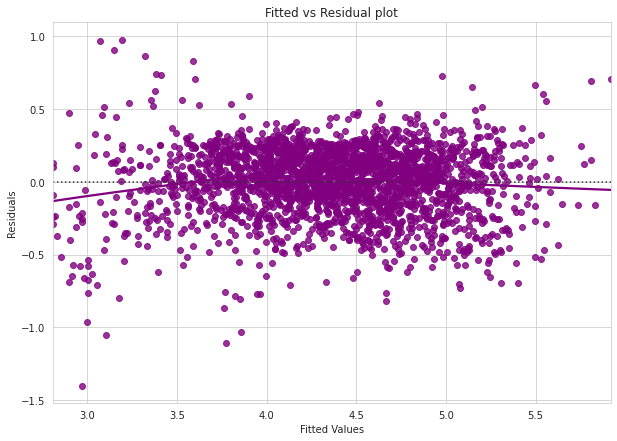

In [75]:
# plot the fitted values against residuals
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Observation:
* The graph shows no pattern, this means that the assumption of linearity and independence is satisfied. 

### 3. Test for normality

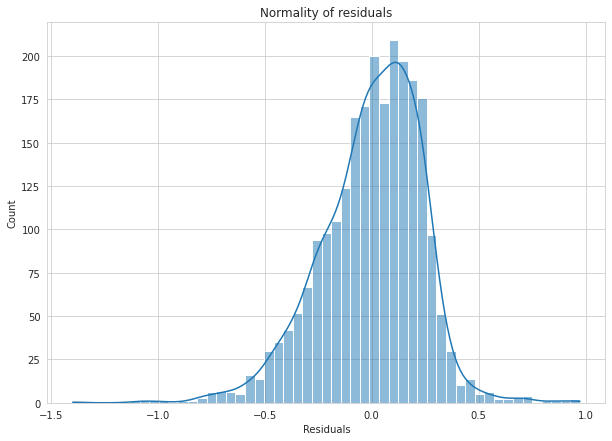

In [76]:
# plot the histogram of residuals
plt.figure(figsize=(10,7))
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

* The plot of residuals does not seem to follow a normal distribution.

### QQ Plot check

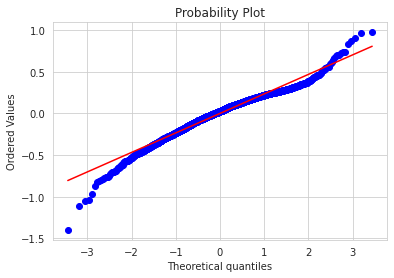

In [77]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Majority of the points lie on the straight line in the QQ plot except the tails on both sides.

### Let's do the Shapiro-Wilk test

In [78]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9724059700965881, pvalue=3.4750859197375706e-21)

* The p-value is less than 0.05, therefore the residuals are not normal as per shapiro test.
* The residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal.
* hence, the assumption of normality is satisfied.

#### Test for homoscedasticity

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [80]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0361092362262743), ('p-value', 0.2696458919909567)]

* Since the p-value > 0.05, we can say the residuals are homoscedastic and the model  satsfied the assumption of homoscedasticity.







In [81]:
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     1355.
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:12   Log-Likelihood:                 50.277
No. Observations:                   2417   AIC:                            -80.55
Df Residuals:                       2407   BIC:                            -22.65
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Observation:
* Adjusted R-squared is 0.835, which shows that the model is able to explain 84% variance in the data. This is quite good and doesn't indicate overfitting.
* A unit increase in the normalized used price  will result in a 0.4001 unit increase in the normalized used price of the device, all other variables remaining constant.
* A unit increase in the weight_log will result in a 0.2646 unit increase in the normalized used price of the device, all other variables remaining constant.

#### Now we can make predictions

In [82]:
# check the model parameters
olsmod2.params

const                  -0.096179
screen_size             0.042125
main_camera_mp          0.021094
selfie_camera_mp        0.018077
int_memory              0.000473
ram                     0.023313
normalized_new_price    0.400059
weight_log              0.264570
os_Others              -0.063924
4g_yes                  0.045295
dtype: float64

In [83]:
# dropping columns from the test data that are not there in the training data
X_test2 = x_test.drop(
    ["battery", "days_used", "os_Windows", "os_iOS","5g_yes","release_year"], axis=1
)

In [84]:
X_train3.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others',
       '4g_yes'],
      dtype='object')

In [85]:
X_test2.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others',
       '4g_yes'],
      dtype='object')

In [86]:
# make predictions on test set
pred = olsmod2.predict(X_test2)
ds_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
ds_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,95.239957,85.293709
2341,50.493131,61.385761
1913,46.349258,51.287291
688,79.867798,71.260352
650,92.475076,134.516033
2291,77.270339,85.484902
40,124.826465,149.792186
1884,58.201721,67.415541
2538,74.439469,62.812359
45,155.759967,158.242673


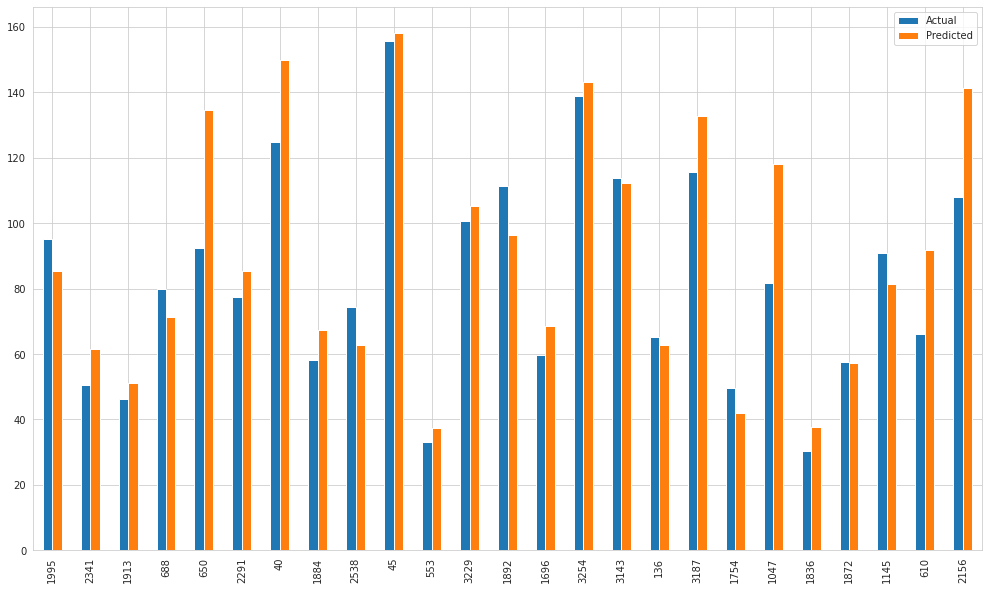

In [87]:
# Visualise comparison
ds3_vis = ds_pred_test.sample(25, random_state=1)
ds3_vis.plot(kind="bar", figsize=(17, 10))
plt.show()

### Observation:
* From the plot above , we can see that the actual and predicted values of used priced aren't so far off. which means our model is good fit.

## Final Model

In [88]:
olsmod_final_model = sm.OLS(y_train, X_train3).fit()
print(olsmod_final_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     1355.
Date:                   Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                           00:33:13   Log-Likelihood:                 50.277
No. Observations:                   2417   AIC:                            -80.55
Df Residuals:                       2407   BIC:                            -22.65
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [89]:
# check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod_final_model, X_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236989,0.183461,0.835149,0.834464,4.421839


In [90]:
# check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod_final_model, X_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244227,0.187878,0.834626,0.833014,4.600977


In [91]:
# print lineal regression equation
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(X_train3.columns)):
    if i == 0:
        print(olsmod2.params[i], "+", end=" ")
    elif i != len(X_train3.columns) - 1:
        print(
            olsmod2.params[i],
            "* (",
            X_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod2.params[i], "* (", X_train3.columns[i], ")")

normalized_used_price = -0.09617931744033253 + 0.042124571137157715 * ( screen_size ) +  0.021094494512146678 * ( main_camera_mp ) +  0.01807706270309238 * ( selfie_camera_mp ) +  0.0004733795289110965 * ( int_memory ) +  0.0233133630462342 * ( ram ) +  0.4000593273689713 * ( normalized_new_price ) +  0.2645703919604926 * ( weight_log ) +  -0.06392403205170491 * ( os_Others ) +  0.0452946158257734 * ( 4g_yes )


### Conclusions:
* The model can explain ~84% of the variation in the data.

* The training and test RMSE and MAE are low and comparable at ~0.24 and ~0.18 and 0.24 and ~0.19 respectively. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.6% of the normalized used price.
* Hence, we can conclude the final model olsmod_final_model is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

* The most strongly positively correelated variable with normaliized used price is normalized new price with a correation of 0.83. This is strongly reinforced by the model as 1 unit increase in the normalized used price  will result in a 0.4001 unit increase in the normalized used price of the device, all other variables remaining constant.This goes to show that the higher the price of a new device, the higher the price of the refurbished version of that device.

* Other factors that significantly affect the price of used phones in the order in which they affect it are;weight(rep by weight_log), 4G,ram, screen_size, main camera mp, selfie camera mp,int memory.

* The above is demonstrated by the positive coeficients of the variables in the final model, therefore, a unt increase in these factors will lead to a significant unit increased in price of the used phone.

* It should also be noted that phones running on other opeating systems rather than IOS, Android and windows tends to reduce the value of used phones/tablets as it has a negative coefficient in the given model.


### Recommendation:
* When refurbishing phones and tablets to sell, Recell needs to take into serious consideration the price of the new version of that device, it's weight,whether it offers 4G & 5G, ram, screen_size, main camera mp, selfie camera mp, int memory and operating system of the phone, as this factors will dictate the price of the device after it has been refurbished.

* Factors such as battery, release year and  number of days used are not really significant in predicting the price of a refurbished phone so shouldn't be greatly considered.

* The above linear model can be said to be a good fit model for predicting the prices of used phones.

___